In [1]:
import pandas as pd
import neurokit2 as nk
import json

In [2]:
sampling_rate = 140

In [3]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/SiyuQian/Stress-recognition-project/master/6D18B021-MAY12.csv")

In [4]:
def convert_unit(x):
    return float(x) / 1000000

In [61]:
ppg_clean = nk.ppg_clean(dataframe['PPG'].apply(convert_unit), sampling_rate= sampling_rate)

In [62]:
ppg = nk.ppg_simulate(duration=30, sampling_rate=140, heart_rate=70)

In [64]:
ppg_signals, info = nk.ppg_process(ppg_clean, sampling_rate=sampling_rate)

In [66]:
peaks = nk.ppg_findpeaks(ppg_clean, sampling_rate=sampling_rate)

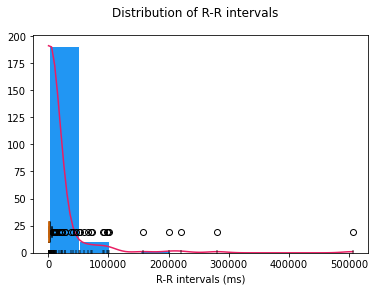

In [67]:
hrv_time = nk.hrv_time(peaks, sampling_rate=sampling_rate, show=True)

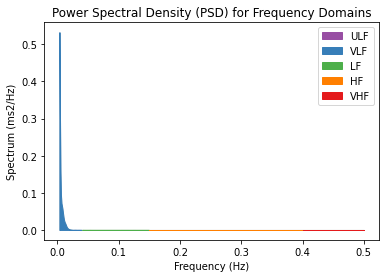

In [68]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=sampling_rate, show=True)

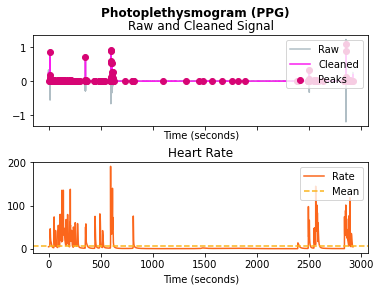

In [69]:
plot = nk.ppg_plot(ppg_signals[:4000000], sampling_rate=sampling_rate)

/opt/conda/lib/python3.9/site-packages/neurokit2/hrv/hrv_nonlinear.py:456: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(ax1[points], ax2[points], "ro", color="k", alpha=0.5, markersize=4)


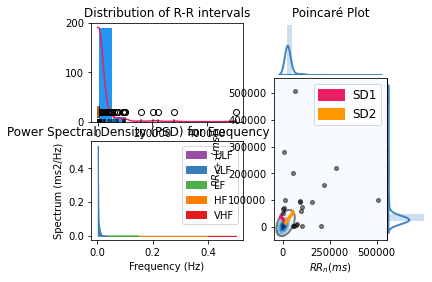

In [43]:
hrv_indices = nk.hrv(peaks, sampling_rate=sampling_rate, show=True)